In [70]:
import shap
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

dataset = fetch_california_housing(as_frame=True)
X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# 출처 : https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

In [71]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 4129it [17:17,  3.94it/s]                          


## "shap_values" variable has 3 attributes
- .data : copy of input data (shap_values.data == X_test.values)
- .base_values : expected value of the target (or the average of target values of all train data)
- .values : shap values for each example (shape = shap_values.data.shape)

In [ ]:
## 다음과 같이 하면 data와 base_values 없이 shap values만 얻을 수 있음
# shape_values = explainer.shape_values(X_test)

In [73]:
# 0번째 데이터에 대한 shap values
i = 0
shap_values[i]

.values =
array([-0.77577813, -0.00769008, -0.04467375, -0.00687002, -0.00401163,
       -0.26418533, -0.45347141, -0.10878412])

.base_values =
2.1491044539999997

.data =
array([ 1.68120000e+00,  2.50000000e+01,  4.19220056e+00,  1.02228412e+00,
        1.39200000e+03,  3.87743733e+00,  3.60600000e+01, -1.19010000e+02])

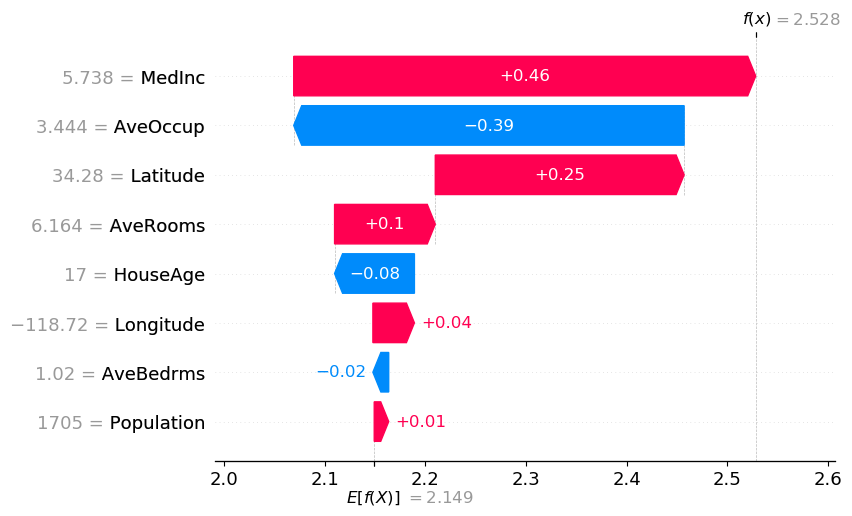

In [74]:
# 한 개의 feature에 대한 shap values 그래프
shap.plots.waterfall(shap_values[3])

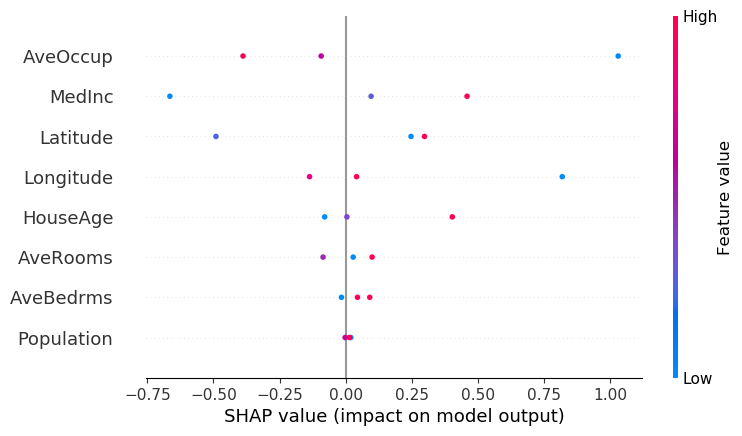

In [75]:
# 각각의 점들은 하나의 데이터의 하나의 feature에 대한 shap value를 나타냄
# 단, 색이 같다고 같은 점은 아님, 색은 feature의 값이 높고 낮음을 나타내는 것
shap.plots.beeswarm(shap_values[1:4])

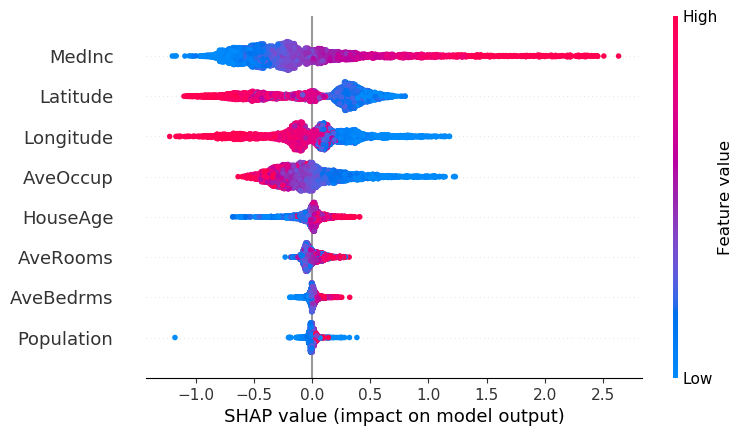

In [76]:
# 전체에 대한 shap value 그래프
shap.plots.beeswarm(shap_values)

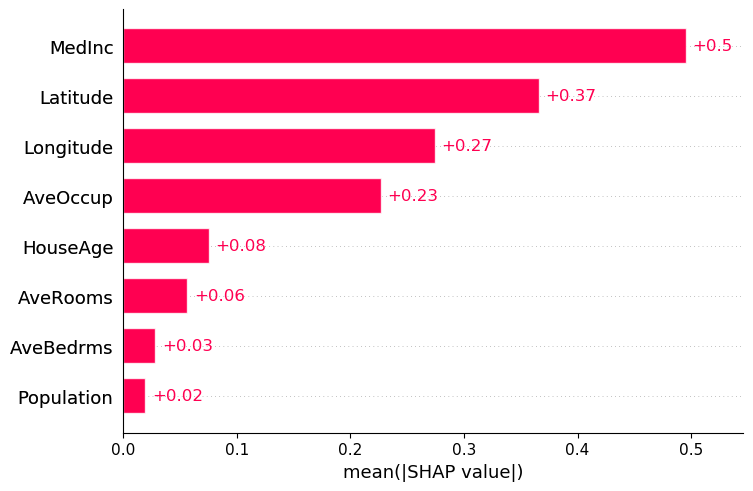

In [61]:
# highest부터 lowest effect까지 정렬 (shap value의 절대값만을 취함)
# 다음 bar plot은 overall한 것으로 하나의 데이터에 대해 보고 싶으면 shap_values[i]를 넣으면 됨(waterfall plot과 같음)
shap.plots.bar(shap_values)

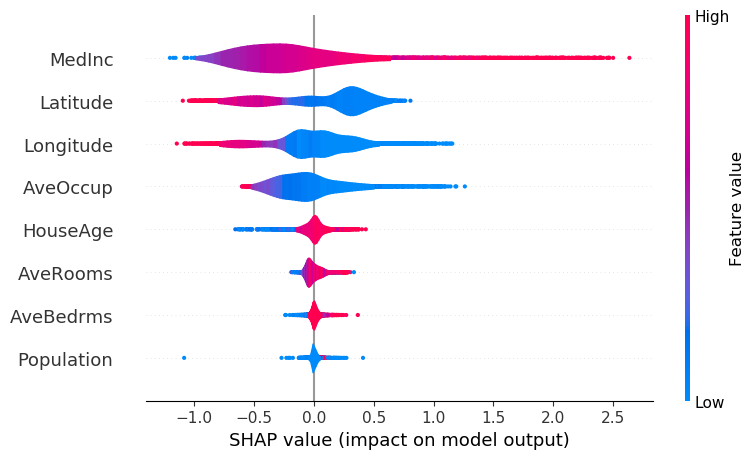

In [63]:
# summary
shap.summary_plot(shap_values, plot_type='violin')

In [64]:
# Force plot은 javascript로 만들어져 있어서 jupyter notebook에서는 보이지 않음, 생략
shap.plots.force(shap_values[0])

In [67]:
# 앙상블 모델이 아니어도 shap value를 구할 수 있음
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
explainer = shap.Explainer(tree.predict, X_test)
shap_values_tree = explainer(X_test)

Exact explainer: 4129it [00:20, 100.99it/s]                          


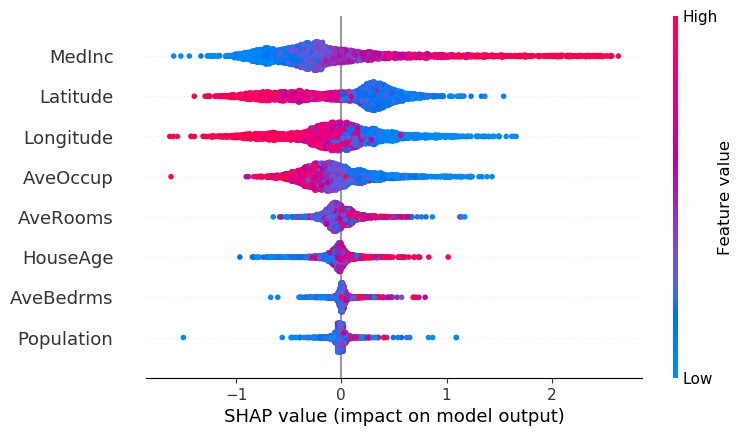

In [68]:
shap.plots.beeswarm(shap_values_tree)